##### <p> Samuel Wolfe <br> August 8, 2023 <br> MSBA 206 <br> DMBA Chapter 9b</p>

In [2]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import requests
import io
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score #
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import scikitplot as skplt
import matplotlib.pylab as plt
import graphviz
from dmba import plotDecisionTree, classificationSummary, regressionSummary,liftChart

In [4]:
def readFile(url):
    download = requests.get(url).content
    # Reading the downloaded content and turning it into a pandas dataframe
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df
def statslist(df):
    dfStats = pd.DataFrame({'Mean' : df.mean(numeric_only=True),
            'SD' : df.std(numeric_only=True),
            'Min' : df.min(),
            'Max' : df.max(),
            'Median' : df.median(numeric_only=True),
            })
    return dfStats
def categorize(df):
    for x in df:
        df[x] = df[x].astype('category')
    return df
def catStringToINT(df,col):
    names = []
    num = []
    for x in df[col].unique():
        names.append((df[col] == x))
    for x in range(len(names)):
        num.append(x+1)
    df[col] = np.select(names, num)
    return df

In [5]:
dfDelays = readFile("https://raw.githubusercontent.com/wolfesamk/MSBA-206/main/dmba/FlightDelays.csv")

In [6]:
dfDelays

CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM  \
0             1455      OH      1455  JFK       184  01/01/2004    5935   
1             1640      DH      1640  JFK       213  01/01/2004    6155   
2             1245      DH      1245  LGA       229  01/01/2004    7208   
3             1715      DH      1709  LGA       229  01/01/2004    7215   
4             1039      DH      1035  LGA       229  01/01/2004    7792   
...            ...     ...       ...  ...       ...         ...     ...   
2196           645      RU       644  EWR       199   1/31/2004    2761   
2197          1700      RU      1653  EWR       213   1/31/2004    2497   
2198          1600      RU      1558  EWR       199   1/31/2004    2361   
2199          1359      RU      1403  EWR       199   1/31/2004    2216   
2200          1730      RU      1736  EWR       199   1/31/2004    2097   

     ORIGIN  Weather  DAY_WEEK  DAY_OF_MONTH TAIL_NUM Flight Status  
0       BWI        0         4             1   N940CA        ontime  
1       DCA        0         4             1   N405FJ        ontime  
2       IAD        0         4             1   N695BR        ontime  
3       IAD        0         4             1   N662BR        ontime  
4       IAD        0         4             1   N698BR        ontime  
...     ...      ...       ...           ...      ...           ...  
2196    DCA        0         6            31   N15555        ontime  
2197    IAD        0         6            31   N16976        ontime  
2198    DCA        0         6            31   N14902        ontime  
2199    DCA        0         6            31   N16961        ontime  
2200    DCA        0         6            31   N13994        ontime  

[2201 rows x 13 columns]

In [7]:
outcome = 'Status'

In [8]:
dfDelays = dfDelays.rename(columns={'Flight Status': outcome})

In [9]:
dfDelays['DAY_WEEK'] = dfDelays['DAY_WEEK'].astype('category')
dfDelays['CRS_DEP_TIME'] = pd.cut(dfDelays['CRS_DEP_TIME'], 8, labels=False)

In [10]:
dfDelays.head(5)

CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM ORIGIN  \
0             4      OH      1455  JFK       184  01/01/2004    5935    BWI   
1             5      DH      1640  JFK       213  01/01/2004    6155    DCA   
2             3      DH      1245  LGA       229  01/01/2004    7208    IAD   
3             5      DH      1709  LGA       229  01/01/2004    7215    IAD   
4             2      DH      1035  LGA       229  01/01/2004    7792    IAD   

   Weather DAY_WEEK  DAY_OF_MONTH TAIL_NUM  Status  
0        0        4             1   N940CA  ontime  
1        0        4             1   N405FJ  ontime  
2        0        4             1   N695BR  ontime  
3        0        4             1   N662BR  ontime  
4        0        4             1   N698BR  ontime

In [11]:
dfDelaysDum = pd.get_dummies(dfDelays.drop(columns=['DAY_OF_MONTH','DEP_TIME']))

In [12]:
dfDelaysDum.head(5)

CRS_DEP_TIME  DISTANCE  FL_NUM  Weather  CARRIER_CO  CARRIER_DH  \
0             4       184    5935        0       False       False   
1             5       213    6155        0       False        True   
2             3       229    7208        0       False        True   
3             5       229    7215        0       False        True   
4             2       229    7792        0       False        True   

   CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  ...  TAIL_NUM_N974DL  \
0       False       False        True       False  ...            False   
1       False       False       False       False  ...            False   
2       False       False       False       False  ...            False   
3       False       False       False       False  ...            False   
4       False       False       False       False  ...            False   

   TAIL_NUM_N975CA  TAIL_NUM_N983CA  TAIL_NUM_N986DL  TAIL_NUM_N987DL  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   TAIL_NUM_N994DL  TAIL_NUM_N995CA  TAIL_NUM_N997DL  Status_delayed  \
0            False            False            False           False   
1            False            False            False           False   
2            False            False            False           False   
3            False            False            False           False   
4            False            False            False           False   

   Status_ontime  
0           True  
1           True  
2           True  
3           True  
4           True  

[5 rows x 607 columns]

In [13]:
dfDelaysDum = dfDelaysDum.drop(columns=['Status_ontime'])

In [14]:
outcome = 'Status_delayed'

In [15]:
X_Delays = dfDelaysDum.drop(columns=outcome)
Y_Delays = dfDelaysDum[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X_Delays, Y_Delays, test_size=0.4, random_state=1)

In [16]:
classTree = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=8, min_impurity_decrease=0.01)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.01, random_state=1)

## 9.2.a Printed Tree

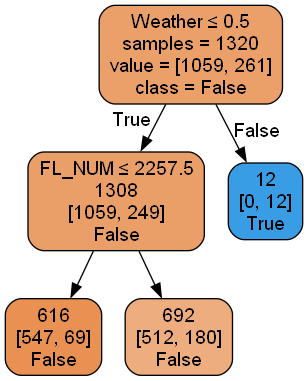

In [17]:
#print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

## 9.2.a Printed results in terms of rules.

In [18]:
print(export_text(classTree,feature_names=X_train.columns.to_list(),show_weights=True))

|--- Weather <= 0.50
|   |--- FL_NUM <= 2257.50
|   |   |--- weights: [547.00, 69.00] class: False
|   |--- FL_NUM >  2257.50
|   |   |--- weights: [512.00, 180.00] class: False
|--- Weather >  0.50
|   |--- weights: [0.00, 12.00] class: True



## 9.2.b No, this model is not useful. It relies on the weather being clear and that is it. You could not reliably predict your specific flight of DCA to EWR on a Monday at 7:00 AM. I would need to know if the flight coming in was delayed. Is the weather at destination or at origin. Will the weather possibly pass before the flight takes of or lands. Is there weather moving in. The redundant variables are everything related to flight identifiers, date, and flight number.

## 9.2.c Redoing the trees

In [19]:
dfDelaysDum = pd.get_dummies(dfDelays.drop(columns=['DAY_OF_MONTH','DEP_TIME','FL_DATE','TAIL_NUM','FL_NUM','Weather']))

In [20]:
dfDelaysDum.head(5)

CRS_DEP_TIME  DISTANCE  CARRIER_CO  CARRIER_DH  CARRIER_DL  CARRIER_MQ  \
0             4       184       False       False       False       False   
1             5       213       False        True       False       False   
2             3       229       False        True       False       False   
3             5       229       False        True       False       False   
4             2       229       False        True       False       False   

   CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  ...  ORIGIN_IAD  \
0        True       False       False       False  ...       False   
1       False       False       False       False  ...       False   
2       False       False       False       False  ...        True   
3       False       False       False       False  ...        True   
4       False       False       False       False  ...        True   

   DAY_WEEK_1  DAY_WEEK_2  DAY_WEEK_3  DAY_WEEK_4  DAY_WEEK_5  DAY_WEEK_6  \
0       False       False       False        True       False       False   
1       False       False       False        True       False       False   
2       False       False       False        True       False       False   
3       False       False       False        True       False       False   
4       False       False       False        True       False       False   

   DAY_WEEK_7  Status_delayed  Status_ontime  
0       False           False           True  
1       False           False           True  
2       False           False           True  
3       False           False           True  
4       False           False           True  

[5 rows x 25 columns]

In [21]:
dfDelaysDum = dfDelaysDum.drop(columns=['Status_ontime'])

In [22]:
outcome = 'Status_delayed'

In [23]:
X_Delays = dfDelaysDum.drop(columns=outcome)
Y_Delays = dfDelaysDum[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X_Delays, Y_Delays, test_size=0.4, random_state=1)

In [24]:
classTree = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=8, min_impurity_decrease=0.0072)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.0072,
                       random_state=1)

## 9.2.c Printed Small Tree

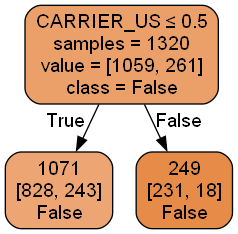

In [25]:
#print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

## 9.2.c Printed Small Tree results in terms of rules.

In [26]:
print(export_text(classTree,feature_names=X_train.columns.to_list(),show_weights=True))

|--- CARRIER_US <= 0.50
|   |--- weights: [828.00, 243.00] class: False
|--- CARRIER_US >  0.50
|   |--- weights: [231.00, 18.00] class: False



In [27]:
classTree = DecisionTreeClassifier(criterion="gini", random_state=1)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## 9.2.c Printed Full Tree

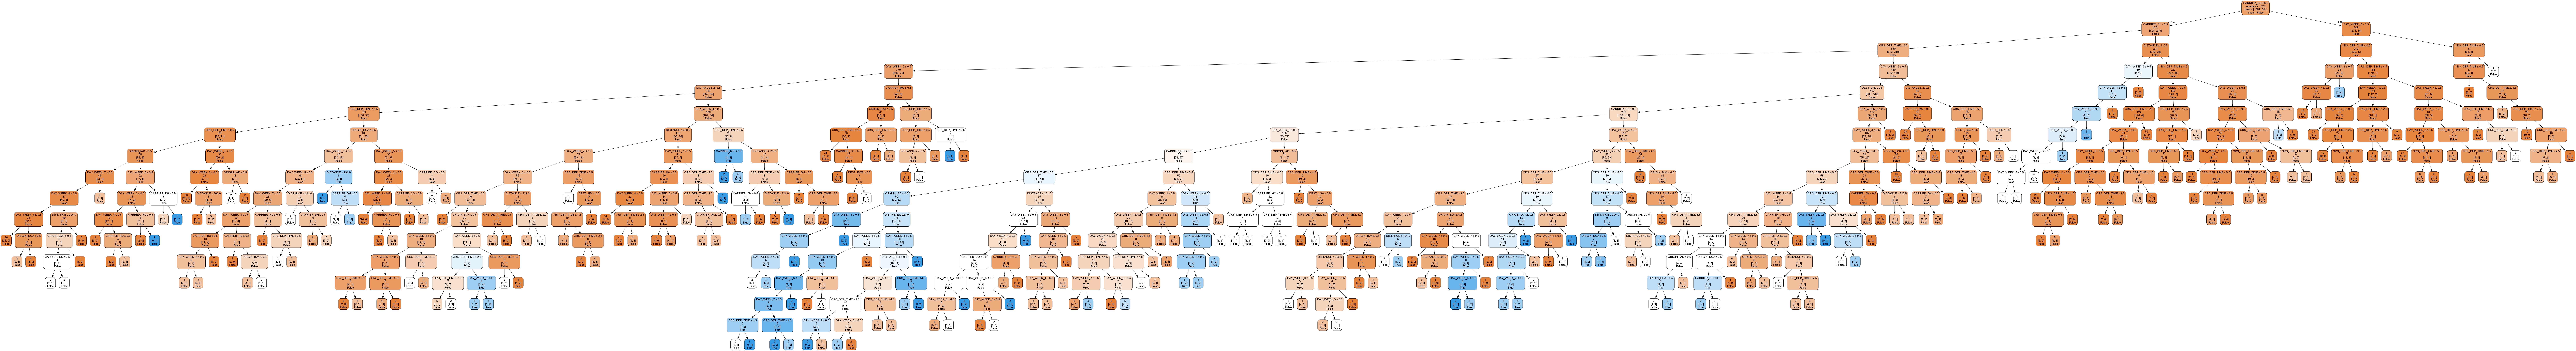

In [28]:
#print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

## 9.2.c Printed Full Tree results in terms of rules.

In [29]:
print(export_text(classTree,feature_names=X_train.columns.to_list(),show_weights=True))

|--- CARRIER_US <= 0.50
|   |--- CARRIER_DL <= 0.50
|   |   |--- CRS_DEP_TIME <= 3.50
|   |   |   |--- DAY_WEEK_3 <= 0.50
|   |   |   |   |--- DISTANCE <= 213.50
|   |   |   |   |   |--- CRS_DEP_TIME <= 1.50
|   |   |   |   |   |   |--- CRS_DEP_TIME <= 0.50
|   |   |   |   |   |   |   |--- ORIGIN_IAD <= 0.50
|   |   |   |   |   |   |   |   |--- DAY_WEEK_7 <= 0.50
|   |   |   |   |   |   |   |   |   |--- DAY_WEEK_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- DAY_WEEK_6 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [26.00, 0.00] class: False
|   |   |   |   |   |   |   |   |   |   |--- DAY_WEEK_6 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- DAY_WEEK_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- DISTANCE <= 206.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- DISTANCE >  206.00
|   |   |   |   |  

#### 9.2.c.i For classifying if your flight is delayed, knowing that Carrier_US is the greatest determinant of whether or not your flight delayed can be useful. Not at the time of being in the airport though.
#### 9.2.c.ii If you do not fly US Airlines you will be on time.
#### 9.2.c.iii CARRIER_US <= 0.50, CARRIER_DL <= 0.50, CRS_DEP_TIME <= 3.50 are the top three predictors.
#### 9.2.c.iv The min_imputiry_decrease value is set to strictly.
#### 9.2.c.v Using the top three predictors makes it dependant on a customer having either or that carrier and departure time.
#### 9.2.c.vi Its a categorical method, a lot of the predictive power of this dataset likely comes from the distances involved, weather, and departure time.

## 9.3

In [30]:
dfToyCor = readFile("https://raw.githubusercontent.com/wolfesamk/MSBA-206/main/dmba/ToyotaCorolla.csv")

In [31]:
dfToyCor

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                  1               1      0          0            0   
1                  0               1      0          0            0   
2                  0               1      0          0            0   
3                  0               1      0          0            0   
4                  1               1      0          1            0   
...              ...             ...    ...        ...          ...   
1431               1               1      0          1            1   
1432               0               1      0          0            1   
1433               0               1      0          0            0   
1434               0               0      0          0            0   
1435               0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Parking_Assistant  \
0                    1             0               0                  0   
1                    1             0               0                  0   
2                    1             0               0                  0   
3                    1             0               0                  0   
4                    1             0               0                  0   
...                ...           ...             ...                ...   
1431                 1             0               0                  0   
1432                 1             0               0                  0   
1433                 1             0               0                  0   
1434                 1             0               0                  0   
1435                 0             0               0                  0   

      Tow_Bar  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1431        0  
1432        0  
1433        0  
1434        0  
1435        0  

[1436 rows x 39 columns]

In [32]:
outcome = 'Price'
predictors = ['Age_08_04','KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

In [33]:
dfToyCorDum = pd.get_dummies(dfToyCor[predictors], prefix=['Fuel_Type'],columns=['Fuel_Type'])

In [34]:
predictors = dfToyCorDum.columns.to_list()
dfToyCorDum.head(5)

Age_08_04     KM  HP  Automatic  Doors  Quarterly_Tax  Mfr_Guarantee  \
0         23  46986  90          0      3            210              0   
1         23  72937  90          0      3            210              0   
2         24  41711  90          0      3            210              1   
3         26  48000  90          0      3            210              1   
4         30  38500  90          0      3            210              1   

   Guarantee_Period  Airco  Automatic_airco  CD_Player  Powered_Windows  \
0                 3      0                0          0                1   
1                 3      1                0          1                0   
2                 3      0                0          0                0   
3                 3      0                0          0                0   
4                 3      1                0          0                1   

   Sport_Model  Tow_Bar  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0            0        0          False              True             False  
1            0        0          False              True             False  
2            0        0          False              True             False  
3            0        0          False              True             False  
4            0        0          False              True             False

In [35]:
X_ToyCor = dfToyCorDum
Y_ToyCor = dfToyCor[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X_ToyCor, Y_ToyCor, test_size=0.4, random_state=1)

In [36]:
# Create regression tree classifier using the mean squared error criterion 
# and set a maximum depth of 3
reg_tree = DecisionTreeRegressor(random_state=1) #to do

# Train Decision Tree Classifer on the training data
reg_tree = reg_tree.fit(X_train,y_train) #to do

#Predict the targets for test dataset
y_pred = reg_tree.predict(X_valid) #to do

In [37]:
# Compare the model predictions to the true values on the test data
# use the mean squared error metric from scikit learn which you will have to import too!

mean_squared_error(y_valid, y_pred)#to do

2073919.744347826

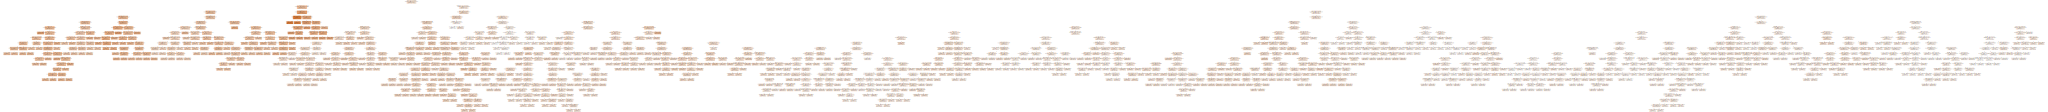

In [38]:
dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                                feature_names=predictors,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [39]:
text_representation = tree.export_text(reg_tree)
print(text_representation)

|--- feature_0 <= 32.50
|   |--- feature_2 <= 113.00
|   |   |--- feature_0 <= 21.00
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_1 <= 20052.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- value: [23750.00]
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- feature_4 <= 4.50
|   |   |   |   |   |   |   |--- feature_0 <= 14.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 5750.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 4.00
|   |   |   |   |   |   |   |   |   |   |--- value: [17795.00]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  4.00
|   |   |   |   |   |   |   |   |   |   |--- value: [17900.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  5750.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 77.00
|   |   |   |   |   |   |   |   |   |   |--- value: [18800.00]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  77.00
|   |   |   |   |   |   |   |   |   |   |--- value: [18500.00]

In [40]:
important = pd.DataFrame({'Features': X_train.columns, 'importance':reg_tree.feature_importances_})
important.sort_values(by='importance',ascending=False).head(3)

Features  importance
0  Age_08_04    0.834798
1         KM    0.059568
2         HP    0.052097

#### 9.3.a.i Age, HP, KM.

In [41]:
regressionSummary(y_train, reg_tree.predict(X_train))
regressionSummary(y_valid, reg_tree.predict(X_valid))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000

Regression statistics

                      Mean Error (ME) : 73.9461
       Root Mean Squared Error (RMSE) : 1440.1110
            Mean Absolute Error (MAE) : 1107.1843
          Mean Percentage Error (MPE) : -0.4775
Mean Absolute Percentage Error (MAPE) : 10.9358


#### 9.3.a.ii Its over fitting the model. Boxplots are not needed to show this.

In [42]:
#this section takes 3.9s
param_grid={
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_impurity_decrease': [0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010],
    'min_samples_split': [14,15,16,17,18,19,20,21,22,23,24,25]
}
gridSearch = GridSearchCV(DecisionTreeRegressor(),param_grid, cv=5,n_jobs=-1)
gridSearch.fit(X_train,y_train)
print('Best Parms: ', gridSearch.best_params_)

Best Parms:  {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_split': 19}


In [43]:
# Create regression tree classifier using the mean squared error criterion 
# and set a maximum depth of 3
reg_tree = DecisionTreeRegressor(random_state=1,max_depth=7,min_impurity_decrease=0.001,min_samples_split=19) #to do

# Train Decision Tree Classifer on the training data
reg_tree = reg_tree.fit(X_train,y_train) #to do

#Predict the targets for test dataset
y_pred = reg_tree.predict(X_valid) #to do

In [44]:
# Compare the model predictions to the true values on the test data
# use the mean squared error metric from scikit learn which you will have to import too!

mean_squared_error(y_valid, y_pred)#to do

1548564.9075787778

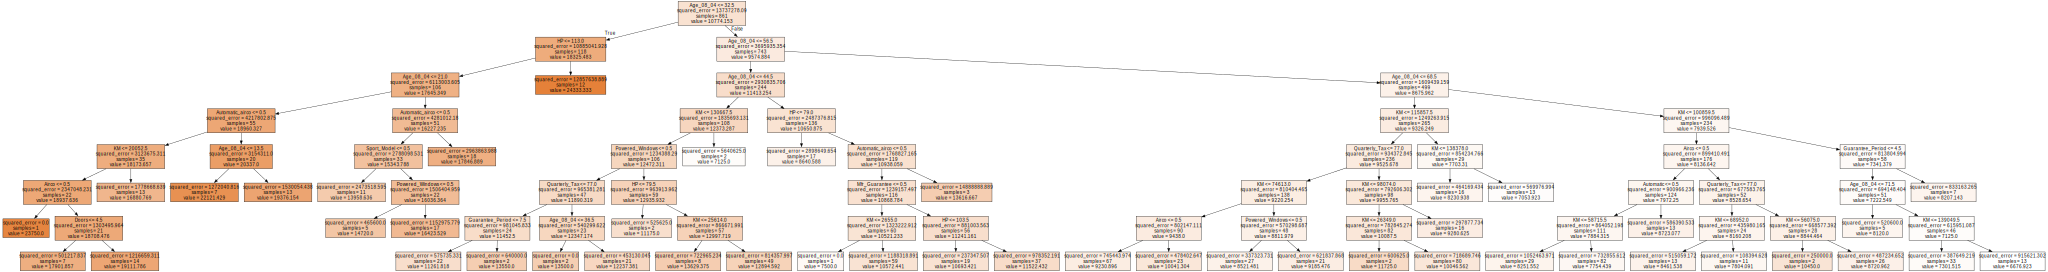

In [45]:
dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                                feature_names=predictors,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [46]:
text_representation = tree.export_text(reg_tree)
print(text_representation)

|--- feature_0 <= 32.50
|   |--- feature_2 <= 113.00
|   |   |--- feature_0 <= 21.00
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_1 <= 20052.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- value: [23750.00]
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- feature_4 <= 4.50
|   |   |   |   |   |   |   |--- value: [17901.86]
|   |   |   |   |   |   |--- feature_4 >  4.50
|   |   |   |   |   |   |   |--- value: [19111.79]
|   |   |   |   |--- feature_1 >  20052.50
|   |   |   |   |   |--- value: [16880.77]
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- feature_0 <= 13.50
|   |   |   |   |   |--- value: [22121.43]
|   |   |   |   |--- feature_0 >  13.50
|   |   |   |   |   |--- value: [19376.15]
|   |   |--- feature_0 >  21.00
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- value: [13958.64]
|   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |--- featur

In [47]:
important = pd.DataFrame({'Features': X_train.columns, 'importance':reg_tree.feature_importances_})
important.sort_values(by='importance',ascending=False).head(3)

Features  importance
0  Age_08_04    0.888383
2         HP    0.052826
1         KM    0.024823

In [48]:
regressionSummary(y_train, reg_tree.predict(X_train))
regressionSummary(y_valid, reg_tree.predict(X_valid))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1038.9184
            Mean Absolute Error (MAE) : 742.5818
          Mean Percentage Error (MPE) : -0.9049
Mean Absolute Percentage Error (MAPE) : 7.1758

Regression statistics

                      Mean Error (ME) : 28.3958
       Root Mean Squared Error (RMSE) : 1244.4135
            Mean Absolute Error (MAE) : 944.2862
          Mean Percentage Error (MPE) : -0.9772
Mean Absolute Percentage Error (MAPE) : 9.3784


#### 9.3.a.iv The difference is about 44 RMSE, making the CV result slightly less accurate with the validation set, but the MPE is lower, which I take as an improvement.

## 9.3.b

In [49]:
dfToyCor

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                  1               1      0          0            0   
1                  0               1      0          0            0   
2                  0               1      0          0            0   
3                  0               1      0          0            0   
4                  1               1      0          1            0   
...              ...             ...    ...        ...          ...   
1431               1               1      0          1            1   
1432               0               1      0          0            1   
1433               0               1      0          0            0   
1434               0               0      0          0            0   
1435               0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Parking_Assistant  \
0                    1             0               0                  0   
1                    1             0               0                  0   
2                    1             0               0                  0   
3                    1             0               0                  0   
4                    1             0               0                  0   
...                ...           ...             ...                ...   
1431                 1             0               0                  0   
1432                 1             0               0                  0   
1433                 1             0               0                  0   
1434                 1             0               0                  0   
1435                 0             0               0                  0   

      Tow_Bar  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1431        0  
1432        0  
1433        0  
1434        0  
1435        0  

[1436 rows x 39 columns]

In [50]:
outcome = 'Binned_Price'
predictors = ['Age_08_04','KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

In [51]:
dfToyCor[outcome] = pd.cut(dfToyCor['Price'], 20, labels=False)
dfToyCor[outcome] = dfToyCor[outcome].astype('category')

In [52]:
dfToyCorDum = pd.get_dummies(dfToyCor[predictors], prefix=['Fuel_Type'],columns=['Fuel_Type'])

In [53]:
predictors = dfToyCorDum.columns.to_list()
dfToyCorDum.head(5)

Age_08_04     KM  HP  Automatic  Doors  Quarterly_Tax  Mfr_Guarantee  \
0         23  46986  90          0      3            210              0   
1         23  72937  90          0      3            210              0   
2         24  41711  90          0      3            210              1   
3         26  48000  90          0      3            210              1   
4         30  38500  90          0      3            210              1   

   Guarantee_Period  Airco  Automatic_airco  CD_Player  Powered_Windows  \
0                 3      0                0          0                1   
1                 3      1                0          1                0   
2                 3      0                0          0                0   
3                 3      0                0          0                0   
4                 3      1                0          0                1   

   Sport_Model  Tow_Bar  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0            0        0          False              True             False  
1            0        0          False              True             False  
2            0        0          False              True             False  
3            0        0          False              True             False  
4            0        0          False              True             False

In [54]:
X_ToyCor = dfToyCorDum
Y_ToyCor = dfToyCor[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X_ToyCor, Y_ToyCor, test_size=0.4, random_state=1)

In [55]:
#this section takes 8.8s
param_grid={
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_impurity_decrease': [0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010],
    'min_samples_split': [14,15,16,17,18,19,20,21,22,23,24,25]
}
gridSearch = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5,n_jobs=-1)
gridSearch.fit(X_train,y_train)
print('Best Parms: ', gridSearch.best_params_)

c:\Users\Sam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parms:  {'criterion': 'entropy', 'max_depth': 11, 'min_impurity_decrease': 0.01, 'min_samples_split': 14}


In [56]:
classTree = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=10, min_impurity_decrease=0.01, min_samples_split=14)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_impurity_decrease=0.01, min_samples_split=14,
                       random_state=1)

## 9.2.c Printed Small Tree

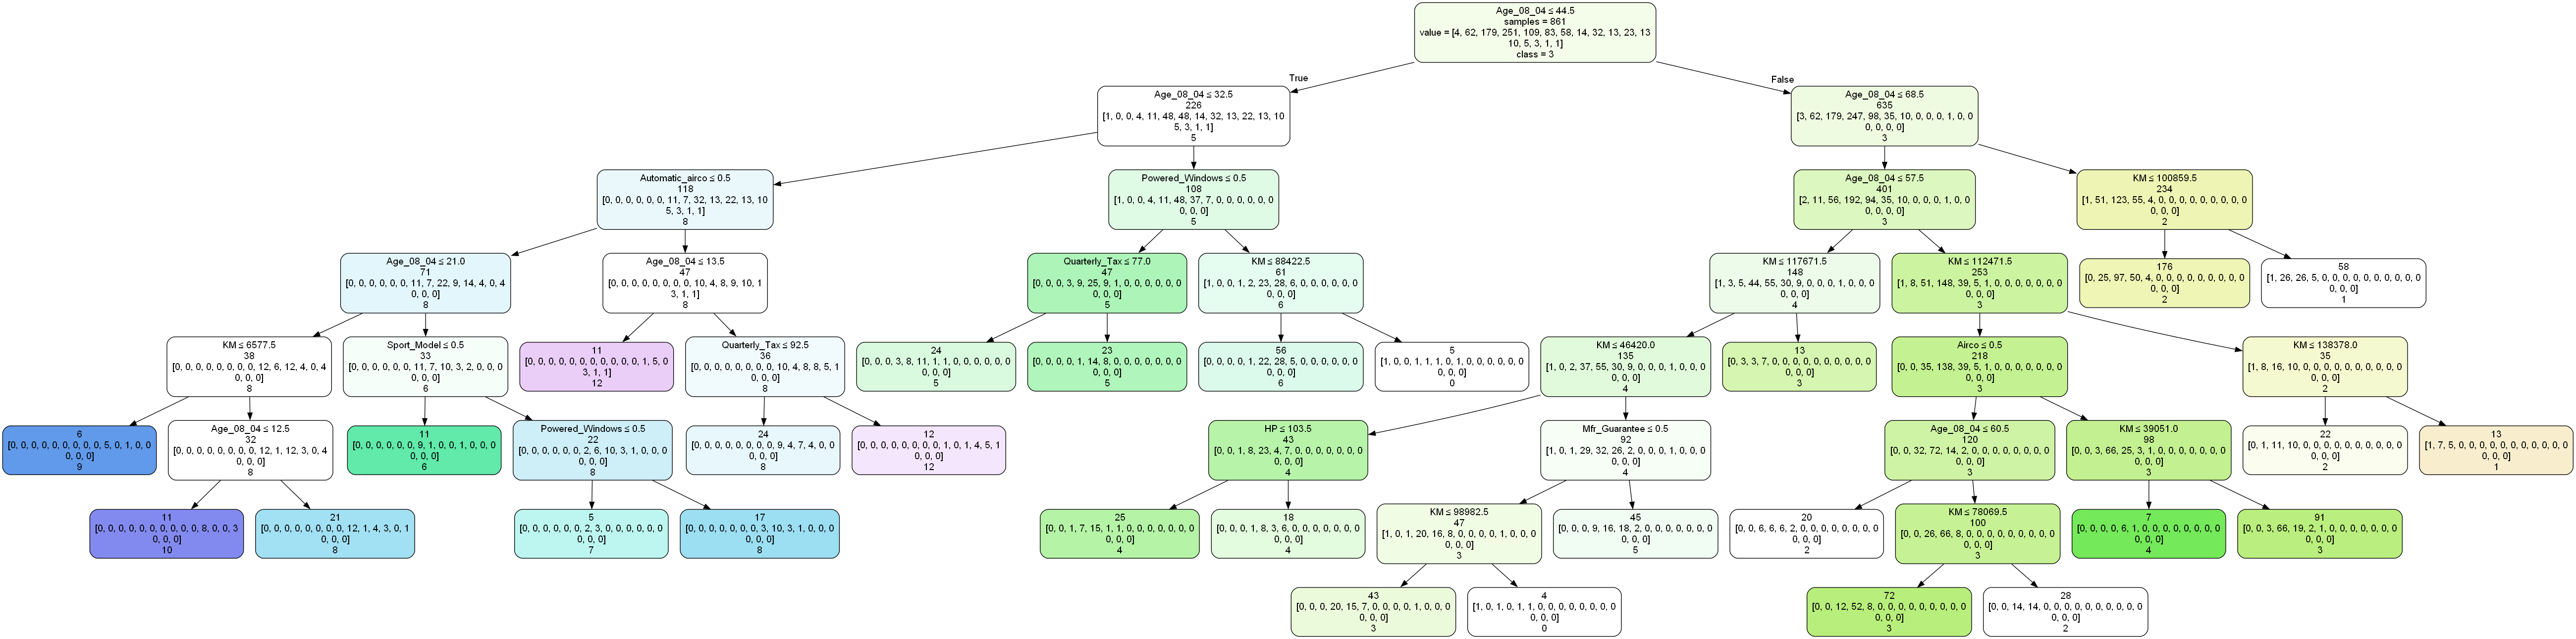

In [57]:
#print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

In [58]:
important = pd.DataFrame({'Features': X_train.columns, 'importance':classTree.feature_importances_})
important.sort_values(by='importance',ascending=False).head(3)

Features  importance
0        Age_08_04    0.747835
1               KM    0.141705
9  Automatic_airco    0.027877

In [59]:
classificationSummary(y_train, classTree.predict(X_train))
classificationSummary(y_valid, classTree.predict(X_valid))

Confusion Matrix (Accuracy 0.5505)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
     0   2   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     1   0  33  26   3   0   0   0   0   0   0   0   0   0   0   0   0   0
     2   1  31 128  18   1   0   0   0   0   0   0   0   0   0   0   0   0
     3   1   5  80 145   8  12   0   0   0   0   0   0   0   0   0   0   0
     4   2   0  10  42  29  25   1   0   0   0   0   0   0   0   0   0   0
     5   2   0   2   9   5  43  22   0   0   0   0   0   0   0   0   0   0
     6   0   0   0   1   7  11  37   2   0   0   0   0   0   0   0   0   0
     7   1   0   0   0   0   1   6   3   3   0   0   0   0   0   0   0   0
     8   0   0   0   0   0   0   0   0  31   0   0   0   1   0   0   0   0
     9   0   0   0   0   0   0   0   0   8   5   0   0   0   0   0   0   0
    10   0   0   0   1   0   0   1   0  12   0   8   0   1   0   0   0   0
    11   0   0   0   0   0   0   0   0   7   1

In [60]:
#this section takes 2.6s
param_grid={
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_impurity_decrease': [0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010],
    'min_samples_split': [14,15,16,17,18,19,20,21,22,23,24,25]
}
gridSearch = GridSearchCV(DecisionTreeRegressor(),param_grid, cv=5,n_jobs=-1)
gridSearch.fit(X_train,y_train)
print('Best Parms: ', gridSearch.best_params_)

Best Parms:  {'max_depth': 6, 'min_impurity_decrease': 0.007, 'min_samples_split': 16}


In [61]:
# Create regression tree classifier using the mean squared error criterion 
# and set a maximum depth of 3
reg_tree = DecisionTreeRegressor(random_state=1,max_depth=6,min_impurity_decrease=0.007,min_samples_split=16) #to do

# Train Decision Tree Classifer on the training data
reg_tree = reg_tree.fit(X_train,y_train) #to do

#Predict the targets for test dataset
y_pred = reg_tree.predict(X_valid) #to do

In [62]:
# Compare the model predictions to the true values on the test data
# use the mean squared error metric from scikit learn which you will have to import too!

mean_squared_error(y_valid, y_pred)#to do

0.7988908530181893

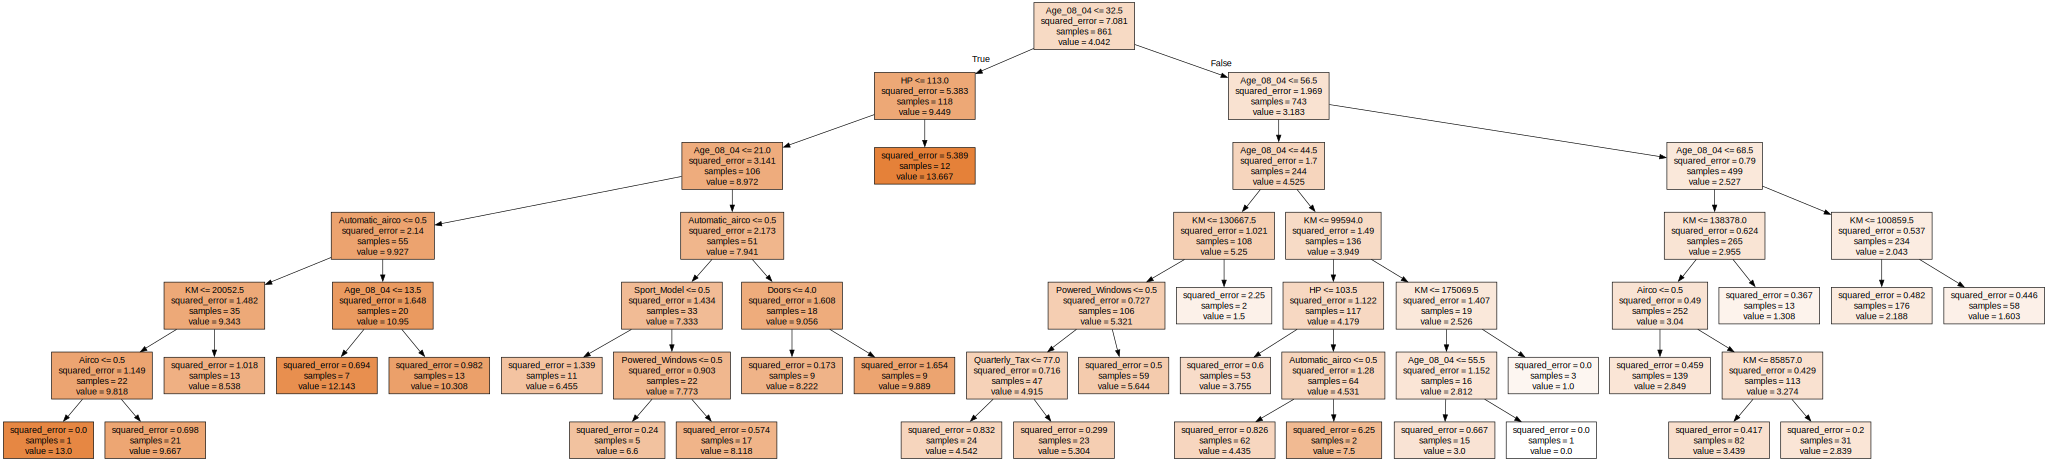

In [63]:
dot_data = tree.export_graphviz(reg_tree, out_file=None, 
                                feature_names=predictors,  
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [64]:
text_representation = tree.export_text(reg_tree)
print(text_representation)

|--- feature_0 <= 32.50
|   |--- feature_2 <= 113.00
|   |   |--- feature_0 <= 21.00
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_1 <= 20052.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- value: [13.00]
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- value: [9.67]
|   |   |   |   |--- feature_1 >  20052.50
|   |   |   |   |   |--- value: [8.54]
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- feature_0 <= 13.50
|   |   |   |   |   |--- value: [12.14]
|   |   |   |   |--- feature_0 >  13.50
|   |   |   |   |   |--- value: [10.31]
|   |   |--- feature_0 >  21.00
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- value: [6.45]
|   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |--- value: [6.60]
|   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |--- value: [8.12]
|   |   |   |--- feature_9 

In [65]:
important = pd.DataFrame({'Features': X_train.columns, 'importance':reg_tree.feature_importances_})
important.sort_values(by='importance',ascending=False).head(3)

Features  importance
0  Age_08_04    0.896986
2         HP    0.045896
1         KM    0.027902

## 9.2.b.i Comparing the two types, CT has Age, KM, Automatic_aico, while RT has Age, HP, KM. Because with CT it favors Categorical values.

## 92.b.ii

In [66]:
for x in dfToyCorDum.columns:
    print(x)

Age_08_04
KM
HP
Automatic
Doors
Quarterly_Tax
Mfr_Guarantee
Guarantee_Period
Airco
Automatic_airco
CD_Player
Powered_Windows
Sport_Model
Tow_Bar
Fuel_Type_CNG
Fuel_Type_Diesel
Fuel_Type_Petrol


In [67]:
particular_car = pd.DataFrame([{'Age_08_04': 77,
                                'KM': 117000,
                                'HP': 110,
                                'Automatic': 0,
                                'Doors': 5,
                                'Quarterly_Tax': 100,
                                'Mfr_Guarantee': 0,
                                'Guarantee_Period': 3,
                                'Airco': 1,
                                'Automatic_airco': 0,
                                'CD_Player': 0,
                                'Powered_Windows': 0,
                                'Sport_Model': 0,
                                'Tow_Bar': 1,
                                'Fuel_Type_CNG':0,
                                'Fuel_Type_Diesel':0,
                                'Fuel_Type_Petrol':1
                                }])

In [68]:
pd.cut(dfToyCor.Price, 20).cat.categories[classTree.predict(particular_car)]

IntervalIndex([(5757.5, 7165.0]], dtype='interval[float64, right]')

In [69]:
classTree.predict(particular_car)

array([1], dtype=int64)

## 9.3.b.iii We are not given a way to predict the price if the method is regression. This is a bad question.